# K-NEAREST NEIGHBOURS

### Objective:


#### The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm for classification using the given datasets

### Dataset:

#### Need to Classify the animal type

### Tasks:

In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical operations and array handling
import numpy as np

# Import the matplotlib library for creating visualizations
import matplotlib.pyplot as plt

# Import seaborn library for making statistical graphics
import seaborn as sns

In [2]:
# Read the CSV file named "Zoo.csv" into a pandas DataFrame called 'zoo'
zoo = pd.read_csv("Zoo.csv")

# Display the contents of the DataFrame 'zoo'
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
# Display the data types of each column in the DataFrame 'zoo'
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [4]:
# Display the column names of the DataFrame 'zoo'
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [5]:
# Convert specified columns in the DataFrame 'zoo' to categorical data types
zoo = zoo.astype({'animal name': 'category', 'hair': 'category', 'feathers': 'category', 'eggs': 'category', 'milk': 'category',
                  'airborne': 'category', 'aquatic': 'category', 'predator': 'category', 'toothed': 'category', 'backbone': 'category',
                  'breathes': 'category', 'venomous': 'category', 'fins': 'category', 'tail': 'category',
                  'domestic': 'category', 'catsize': 'category', 'type': 'category'})

# Display the data types of each column in the updated DataFrame 'zoo'
zoo.dtypes

animal name    category
hair           category
feathers       category
eggs           category
milk           category
airborne       category
aquatic        category
predator       category
toothed        category
backbone       category
breathes       category
venomous       category
fins           category
legs              int64
tail           category
domestic       category
catsize        category
type           category
dtype: object

In [6]:
# Count the number of duplicate rows in the DataFrame 'zoo'
zoo.duplicated().sum()

0

In [7]:
# Generate descriptive statistics for the DataFrame 'zoo', including count, mean, standard deviation, min, and max values
zoo.describe()

,legs
count,101.000000
mean,2.841584
std,2.033385
min,0.000000
25%,2.000000
50%,4.000000
75%,4.000000
max,8.000000


### 1. Analyse the data using the visualizations

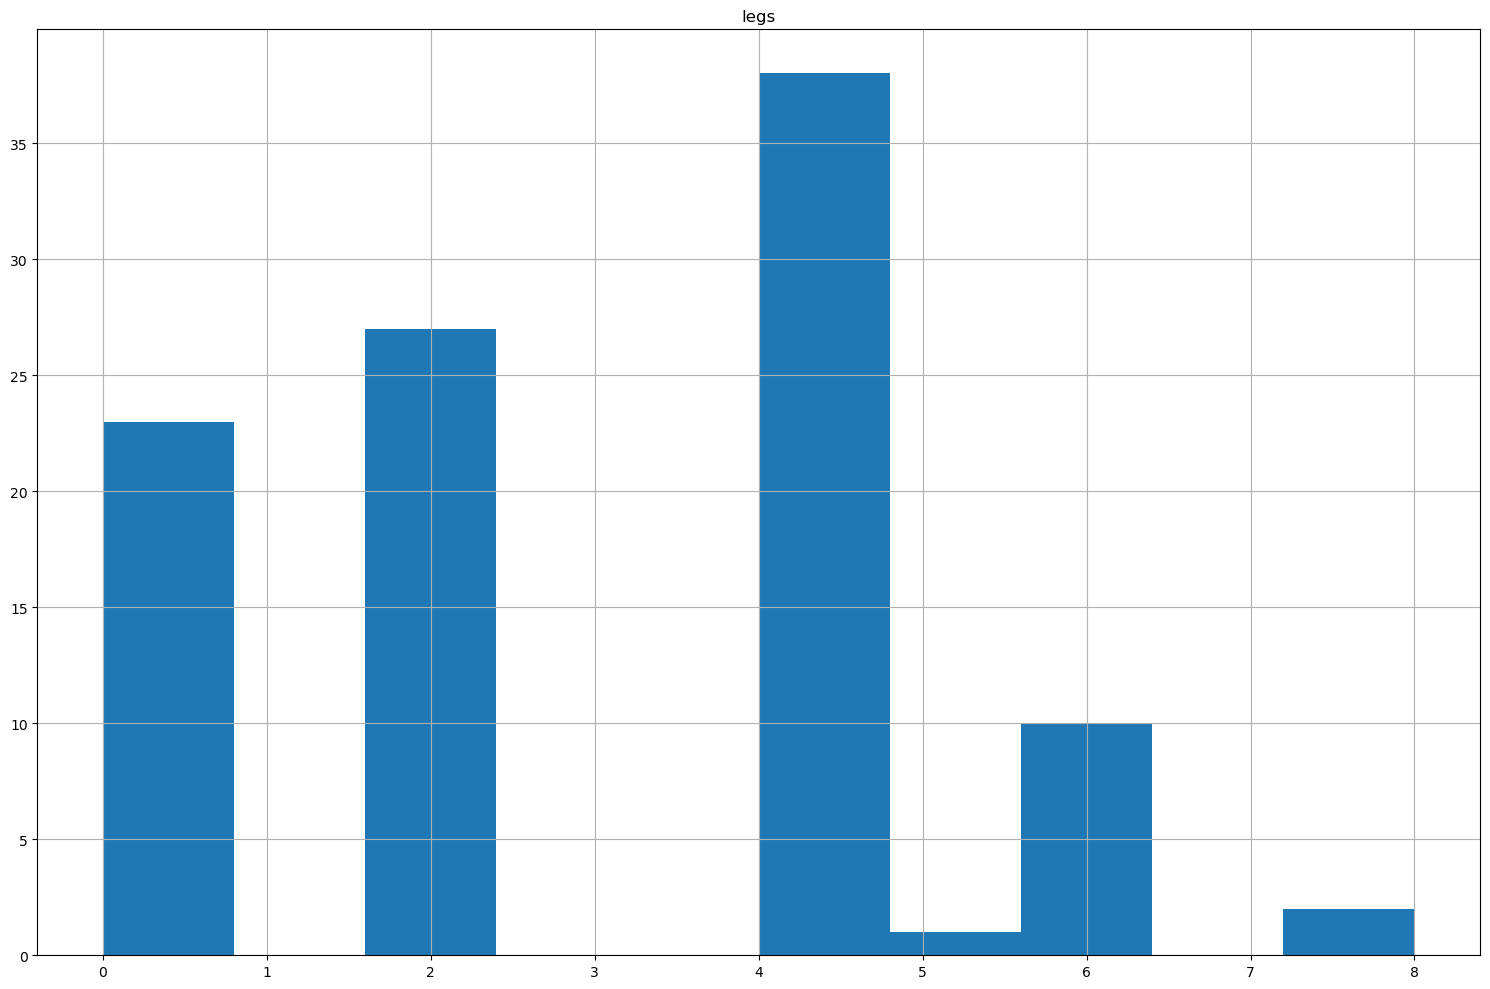

In [8]:
# Create histograms for all numeric columns in the DataFrame 'zoo' with a specified figure size of 15x10 inches
zoo.hist(figsize=(15, 10))

# Adjust the layout to prevent overlap and ensure everything fits within the figure area
plt.tight_layout()

# Display the histograms
plt.show()

### 2. Preprocess the data by handling missing values & Outliers, if any.

In [9]:
# Count the number of missing (null) values in each column of the DataFrame 'zoo'
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [10]:
# Drop the column "animal name" from the DataFrame 'zoo'
zoo = zoo.drop(["animal name"], axis=1)

# Display the shape of the DataFrame 'zoo' after dropping the column
zoo.shape

(101, 17)

In [11]:
# Define a list of categorical columns in the DataFrame 'zoo'
cat_cols = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
            'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
            'fins', 'tail', 'domestic', 'catsize', 'type']

# Define a list of numerical columns in the DataFrame 'zoo'
num_cols = ['legs']

# Print a header for categorical columns
print("******* Categorical Columns *******")

# Print the list of categorical columns
print(cat_cols)

# Print a header for numerical columns
print("\n******* Numerical Columns *******")

# Print the list of numerical columns
print(num_cols)

******* Categorical Columns *******
['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic', 'catsize', 'type']

******* Numerical Columns *******
['legs']


In [12]:
# Identify the first quartile (25th percentile) for numerical columns
Q1 = zoo[num_cols].quantile(0.25)

# Identify the third quartile (75th percentile) for numerical columns
Q3 = zoo[num_cols].quantile(0.75)

# Calculate the Interquartile Range (IQR) as the difference between Q3 and Q1
IQR = Q3 - Q1

# Determine the lower and upper whisker boundaries for detecting outliers
lower_whisker = Q1 - (1.5 * IQR)
upper_whisker = Q3 + (1.5 * IQR)

# Identify outlier values that fall outside the whisker boundaries
outliers = zoo[num_cols][(zoo[num_cols] < lower_whisker) | (zoo[num_cols] > upper_whisker)]

# Drop rows where all columns are NaN from the outliers DataFrame
outlier_rows = outliers.dropna(how='all')

# Count the number of outlier observations
num_of_outliers = outlier_rows.shape[0]

# Print the calculated quartiles, IQR, boundaries, and the number of outliers
print(f"Q1:\n{Q1}\n")
print(f"Q3:\n{Q3}\n")
print(f"IQR:\n{IQR}\n")
print(f"Lower Bound:\n{lower_whisker}\n")
print(f"Upper Bound:\n{upper_whisker}\n")
print(f"Number of Outlier Observations: {num_of_outliers}")

# Display the rows of the DataFrame that are considered outliers
outlier_rows

Q1:
legs    2.0
Name: 0.25, dtype: float64

Q3:
legs    4.0
Name: 0.75, dtype: float64

IQR:
legs    2.0
dtype: float64

Lower Bound:
legs   -1.0
dtype: float64

Upper Bound:
legs    7.0
dtype: float64

Number of Outlier Observations: 2


,legs
53,8.0
72,8.0


In [13]:
# Drop the "type" column from the DataFrame 'zoo' to create feature set 'X'
X = zoo.drop(["type"], axis=1)

# Select the "type" column from the DataFrame 'zoo' as the target variable 'y'
y = zoo["type"]

In [14]:
# Display the first few rows of the feature set 'X'
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [15]:
# Display the first few rows of the target variable 'y'
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: category
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

### 3. Split the dataset into training and testing sets (80% training, 20% testing).

In [16]:
# Import the train_test_split function from sklearn to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Split the feature set 'X' and target variable 'y' into training and testing sets
# 20% of the data is used for testing, with stratification based on 'y' to maintain class proportions
# random_state is set to 107 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=107)

# Print the shape of the training set for features (X_train)
print(" X Train : ", X_train.shape)

# Print the shape of the testing set for features (X_test)
print(" X Test  : ", X_test.shape)

# Print the shape of the training set for the target variable (y_train)
print(" y Train : ", y_train.shape)

# Print the shape of the testing set for the target variable (y_test)
print(" y Test  : ", y_test.shape)

 X Train :  (80, 16)
 X Test  :  (21, 16)
 y Train :  (80,)
 y Test  :  (21,)


### 4. Implement the K-Nearest Neighbours algorithm using a machine learning library like scikit-learn On training dataset

In [17]:
# Import the KNeighborsClassifier class from sklearn for KNN classification
from sklearn.neighbors import KNeighborsClassifier

# Initialize a KNeighborsClassifier model with default parameters
model_1 = KNeighborsClassifier()

# Fit the KNN model on the training data (X_train and y_train)
model_1 = model_1.fit(X_train, y_train)

# Display the fitted KNN model
model_1

KNeighborsClassifier()

In [18]:
# Predict the target variable values for the training set using the fitted KNN model
y_train_preds_1 = model_1.predict(X_train)

# Display the predicted target values for the training set
y_train_preds_1

array([2, 1, 1, 5, 1, 2, 6, 6, 1, 6, 2, 7, 4, 2, 2, 1, 1, 2, 4, 1, 6, 3,
       1, 2, 6, 7, 6, 1, 4, 1, 7, 1, 2, 4, 2, 4, 7, 2, 4, 1, 1, 5, 6, 1,
       1, 4, 2, 1, 4, 1, 1, 2, 2, 1, 1, 7, 5, 1, 1, 1, 1, 7, 4, 2, 2, 4,
       4, 2, 4, 1, 7, 1, 4, 4, 1, 1, 1, 1, 1, 1], dtype=int64)

In [19]:
# Predict the target variable values for the test set using the fitted KNN model
y_test_preds_1 = model_1.predict(X_test)

# Display the predicted target values for the test set
y_test_preds_1

array([4, 1, 1, 2, 1, 2, 6, 1, 7, 2, 1, 6, 4, 1, 5, 1, 1, 7, 4, 2, 1],
      dtype=int64)

In [20]:
# Import necessary evaluation metrics from sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Evaluate the model's performance on the training data
knn_train_accuracy = accuracy_score(y_train, y_train_preds_1)  # Calculate accuracy
knn_train_recall = recall_score(y_train, y_train_preds_1, average="micro")  # Calculate recall
knn_train_precision = precision_score(y_train, y_train_preds_1, average="micro")  # Calculate precision
knn_train_f1_score = f1_score(y_train, y_train_preds_1, average="micro")  # Calculate F1 score

# Evaluate the model's performance on the testing data
knn_test_accuracy = accuracy_score(y_test, y_test_preds_1)  # Calculate accuracy
knn_test_recall = recall_score(y_test, y_test_preds_1, average="micro")  # Calculate recall
knn_test_precision = precision_score(y_test, y_test_preds_1, average="micro")  # Calculate precision
knn_test_f1_score = f1_score(y_test, y_test_preds_1, average="micro")  # Calculate F1 score

# Print the evaluation metrics for the training set
print("******* Training Metrics *******")
print(f"KNN Accuracy: {knn_train_accuracy:.4f}")
print(f"KNN Recall: {knn_train_recall:.4f}")
print(f"KNN Precision: {knn_train_precision:.4f}")
print(f"KNN F1 Score: {knn_train_f1_score:.4f}")

# Print the evaluation metrics for the test set
print("\n******* Testing Metrics *******")
print(f"KNN Accuracy: {knn_test_accuracy:.4f}")
print(f"KNN Recall: {knn_test_recall:.4f}")
print(f"KNN Precision: {knn_test_precision:.4f}")
print(f"KNN F1 Score: {knn_test_f1_score:.4f}")

******* Training Metrics *******
KNN Accuracy: 0.9250
KNN Recall: 0.9250
KNN Precision: 0.9250
KNN F1 Score: 0.9250

******* Testing Metrics *******
KNN Accuracy: 0.9524
KNN Recall: 0.9524
KNN Precision: 0.9524
KNN F1 Score: 0.9524


### 5. Choose an appropriate distance metric and value for K.


In [21]:
# Define a range of K values to try for the KNN classifier (from 1 to 20)
k_values = range(1, 21)

# Initialize empty lists to store the accuracy results for training and testing sets
train_accuracies = []
test_accuracies = []

### 6. Evaluate the classifier's performance on the testing set using accuracy, precision, recall, and F1-score metrics.

In [22]:
# Loop over K values and evaluate the KNN model for each K
for k in k_values:
    # Initialize the KNN classifier with the current K value
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    # Train the KNN model on the training data
    knn_model.fit(X_train, y_train)
    
    # Make predictions on both the training and testing data
    y_train_preds_knn = knn_model.predict(X_train)
    y_test_preds_knn = knn_model.predict(X_test)
    
    # Calculate the accuracy for the training set
    train_accuracy = accuracy_score(y_train, y_train_preds_knn)
    
    # Calculate the accuracy for the testing set
    test_accuracy = accuracy_score(y_test, y_test_preds_knn)
    
    # Append the training and testing accuracy to the respective lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    # Print the results for the current value of K
    print(f"K = {k}:")
    print(f"  Training Accuracy: {train_accuracy:.4f}")
    print(f"  Testing Accuracy: {test_accuracy:.4f}")
    print()

K = 1:
  Training Accuracy: 1.0000
  Testing Accuracy: 0.9524

K = 2:
  Training Accuracy: 0.9750
  Testing Accuracy: 0.9524

K = 3:
  Training Accuracy: 0.9750
  Testing Accuracy: 0.9524

K = 4:
  Training Accuracy: 0.9625
  Testing Accuracy: 0.9524

K = 5:
  Training Accuracy: 0.9250
  Testing Accuracy: 0.9524

K = 6:
  Training Accuracy: 0.8875
  Testing Accuracy: 0.8571

K = 7:
  Training Accuracy: 0.8875
  Testing Accuracy: 0.7619

K = 8:
  Training Accuracy: 0.8250
  Testing Accuracy: 0.7619

K = 9:
  Training Accuracy: 0.8125
  Testing Accuracy: 0.7619

K = 10:
  Training Accuracy: 0.8125
  Testing Accuracy: 0.7619

K = 11:
  Training Accuracy: 0.8000
  Testing Accuracy: 0.7619

K = 12:
  Training Accuracy: 0.8000
  Testing Accuracy: 0.7619

K = 13:
  Training Accuracy: 0.8000
  Testing Accuracy: 0.7619

K = 14:
  Training Accuracy: 0.7875
  Testing Accuracy: 0.7619

K = 15:
  Training Accuracy: 0.7875
  Testing Accuracy: 0.7619

K = 16:
  Training Accuracy: 0.7875
  Testing Acc

### 7. Visualize the decision boundaries of the classifier.

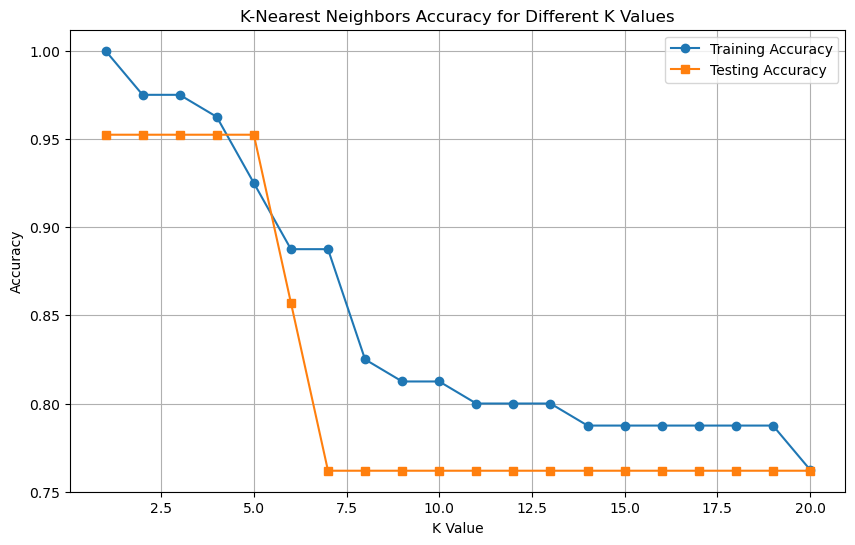

In [23]:
# Plotting the accuracy results for different values of K
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, test_accuracies, label='Testing Accuracy', marker='s')
plt.title('K-Nearest Neighbors Accuracy for Different K Values')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Interview Questions:

### 1. What are the key hyperparameters in KNN?

Key hyperparameters in KNN:

1. k (Number of Neighbors): Determines how many neighbors to consider for voting or averaging.
2. Distance Metric: Defines how to measure the distance between points (e.g., Euclidean, Manhattan).
3. Weights: Determines if all neighbors are equally weighted or closer ones have more influence.
4. Algorithm: Chooses the method for finding nearest neighbors (e.g., brute-force, KD Tree).
5. Leaf Size: Controls the size of the leaf in tree-based search algorithms, affecting speed and memory.
6. p (Minkowski Parameter): Defines the power for the Minkowski distance, generalizing Euclidean (p=2) and Manhattan (p=1).

### 2. What distance metrics can be used in KNN?

Distance metrics used in KNN:

1. Euclidean Distance: Measures straight-line distance between points.
2. Manhattan Distance: Measures distance along the axes (city block distance).
3. Minkowski Distance: Generalizes Euclidean and Manhattan distance.
4. Chebyshev Distance: Measures the maximum absolute difference along any coordinate.
5. Hamming Distance: Used for categorical or binary data.
6. Cosine Distance: Measures the angle between two vectors, often used for high-dimensional data.
7. Mahalanobis Distance: Accounts for correlations between variables.
8. Jaccard Distance: Measures dissimilarity between sets, used for binary data.